In [1]:
%matplotlib inline

import itertools
import matplotlib
from matplotlib import pyplot
import numpy
import os
import pandas
import seaborn

In [2]:
outdir = './figure_pdfs_remade_onc_editor_libs'
if not os.path.isdir(outdir):
    os.makedirs(outdir)

## mtDNA editing dynamics plot

In [28]:
het_data = pandas.read_csv('./SCI-LITE_oncocytoma_timecourse_early_timepoints/heteroplasmy_dataframe.csv')
print(het_data.shape)
het_data.head()

(12894, 8)


,cell_id,condition,umi_count,Mutant,WT,umi_count_for_filtering,umi_count_rank,Mutant_het
0,A2-CTGTAGCC-TGCGGCGC,bc1_10h_rep1,485,0,485,485,164,0.000000
1,A2-ACCACTGT-GCATTCTA,bc1_unedited,299,0,299,299,725,0.000000
2,A2-AAGACGGA-GTTGCTGT,bc1_10h_rep2,594,0,594,594,78,0.000000
3,A2-AGAGTCAA-GTCATCCA,bc1_10h_rep3,397,1,396,397,334,0.002519
4,A2-CATACCAA-CGTCAGTG,bc1_24h_rep2,438,0,438,438,250,0.000000


In [ ]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['bc1_unedited', 'bc1_10h_rep1', 'bc1_10h_rep2', 'bc1_10h_rep3',
          'bc1_24h_rep1', 'bc1_24h_rep2', 'bc1_24h_rep3',
          'bc1_72h_rep1', 'bc1_72h_rep2', 'bc1_72h_rep3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.2, 0.3, 0.4]]))
color_list = [color_list[0]] + color_list[3:]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))

for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='Mutant_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['Mutant_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% nonsense heteroplasmy', fontsize=14)
axes.set_xticks([0,2,5,8])
axes.set_xticklabels(['0h\n(unedited)', '10h', '24h', '72h'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

fig.savefig(os.path.join(outdir, 'editing_dynamics_strip_plot.pdf'), bbox_inches='tight')
fig.tight_layout()

/broad/moothalab/sandbox/tdurham/anaconda/envs/sc_remake2/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator


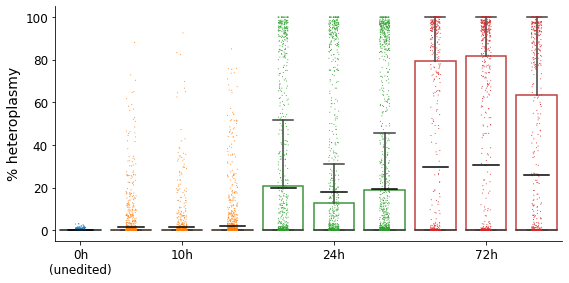

In [5]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['bc1_unedited', 'bc1_10h_rep1', 'bc1_10h_rep2', 'bc1_10h_rep3',
          'bc1_24h_rep1', 'bc1_24h_rep2', 'bc1_24h_rep3',
          'bc1_72h_rep1', 'bc1_72h_rep2', 'bc1_72h_rep3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.2, 0.3, 0.4]]))
color_list = [color_list[0]] + color_list[3:]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))

for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.boxplot(data=het_data, x='condition', y='Mutant_het', ax=axes, order=xorder, 
                palette=color_list, showfliers=False)
seaborn.stripplot(data=het_data, x='condition', y='Mutant_het', dodge=True, s=1, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['Mutant_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))

axes.set_xlabel('')
axes.set_ylabel('% heteroplasmy', fontsize=14)
axes.set_xticks([0,2,5,8])
axes.set_xticklabels(['0h\n(unedited)', '10h', '24h', '72h'], fontsize=12)
axes.set_yticklabels(['', '0', '20', '40', '60', '80', '100'], fontsize=12)

fig.savefig(os.path.join(outdir, 'editing_dynamics_strip_plot.boxplots.pdf'), bbox_inches='tight')
fig.tight_layout()

### Test proportions of the two modes

In [6]:
het_data['condition_no_rep'] = [elt.split('_r')[0] for elt in het_data['condition'].to_numpy()]

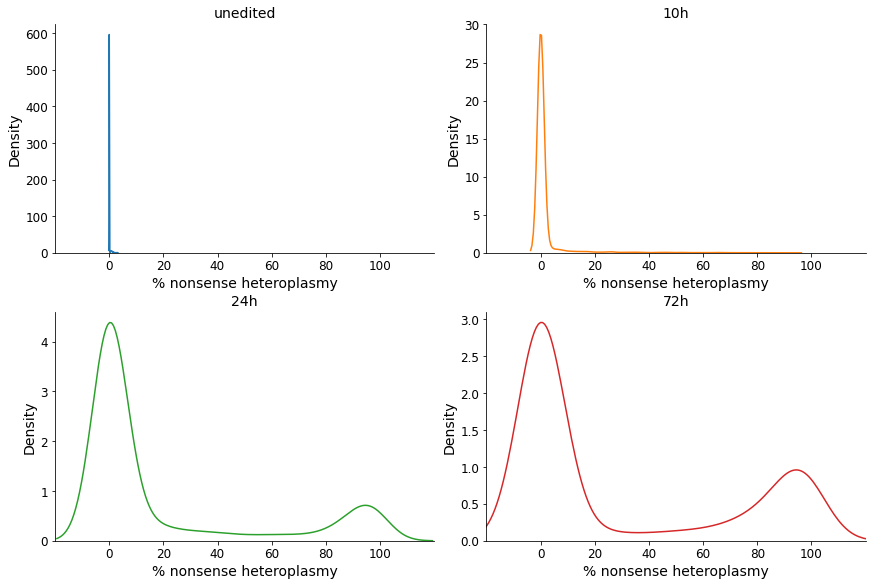

In [7]:
fig, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(12,8), constrained_layout=True)

seaborn.kdeplot(data=het_data[het_data['condition_no_rep'] == 'bc1_unedited'], x='Mutant_het', color='C0', ax=axes[0,0])
axes[0,0].set_title('unedited', fontsize=14)
seaborn.kdeplot(data=het_data[het_data['condition_no_rep'] == 'bc1_10h'], x='Mutant_het', color='C1', ax=axes[0,1])
axes[0,1].set_title('10h', fontsize=14)
seaborn.kdeplot(data=het_data[het_data['condition_no_rep'] == 'bc1_24h'], x='Mutant_het', color='C2', ax=axes[1,0])
axes[1,0].set_title('24h', fontsize=14)
seaborn.kdeplot(data=het_data[het_data['condition_no_rep'] == 'bc1_72h'], x='Mutant_het', color='C3', ax=axes[1,1])
axes[1,1].set_title('72h', fontsize=14)

for ax in axes.flatten():
    for spine_name in ['top', 'right']:
        ax.spines[spine_name].set_visible(False)
    ax.tick_params(labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.set_xlim(-0.2, 1.2)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])
    ax.set_xlabel('% nonsense heteroplasmy')

fig.savefig(os.path.join(outdir, 'bimodal_editing_dynamics.kde.pdf'), bbox_inches='tight')
fig.show()

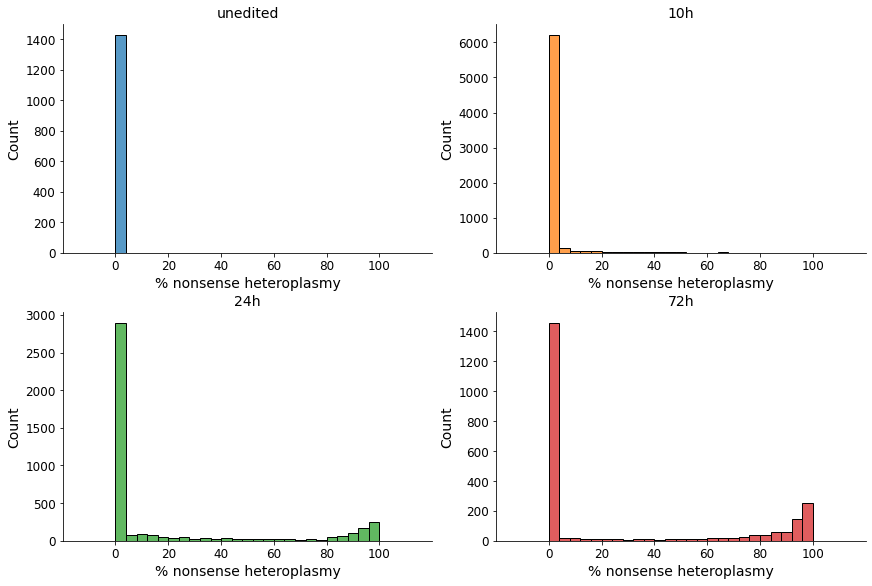

In [8]:
fig, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(12,8), constrained_layout=True)

histbins = numpy.arange(0.05, 1, 0.05)
seaborn.histplot(data=het_data[het_data['condition_no_rep'] == 'bc1_unedited'], x='Mutant_het', 
                 color='C0', bins=25, binrange=[0,1.0], ax=axes[0,0])
axes[0,0].set_title('unedited', fontsize=14)
seaborn.histplot(data=het_data[het_data['condition_no_rep'] == 'bc1_10h'], x='Mutant_het', 
                 color='C1', bins=25, binrange=[0,1.0], ax=axes[0,1])
axes[0,1].set_title('10h', fontsize=14)
seaborn.histplot(data=het_data[het_data['condition_no_rep'] == 'bc1_24h'], x='Mutant_het', 
                 color='C2', bins=25, binrange=[0,1.0], ax=axes[1,0])
axes[1,0].set_title('24h', fontsize=14)
seaborn.histplot(data=het_data[het_data['condition_no_rep'] == 'bc1_72h'], x='Mutant_het', 
                 color='C3', bins=25, binrange=[0,1.0], ax=axes[1,1])
axes[1,1].set_title('72h', fontsize=14)

for ax in axes.flatten():
    for spine_name in ['top', 'right']:
        ax.spines[spine_name].set_visible(False)
    ax.tick_params(labelsize=12)
    ax.xaxis.label.set_size(14)
    ax.yaxis.label.set_size(14)
    ax.set_xlim(-0.2, 1.2)
    ax.set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
    ax.set_xticklabels(['0', '20', '40', '60', '80', '100'])
    ax.set_xlabel('% nonsense heteroplasmy')

fig.savefig(os.path.join(outdir, 'bimodal_editing_dynamics.hist.pdf'), bbox_inches='tight')
fig.show()

In [9]:
for condition in het_data['condition_no_rep'].unique():
    print(condition)
    condition_idx = het_data['condition_no_rep'] == condition
    total_cells = numpy.sum(condition_idx)
    num_low_het = numpy.sum(condition_idx & (het_data['Mutant_het'] <= 0.2))
    num_high_het = numpy.sum(condition_idx & (het_data['Mutant_het'] >= 0.8))
    num_int = total_cells - (num_low_het + num_high_het)
    print(f'Total cells: {total_cells}\n'
          f'Num cells <= 20% het: {num_low_het} ({round((num_low_het/total_cells)*100, 2)} %)\n'
          f'Num intermediate cells: {num_int} ({round((num_int/total_cells)*100, 2)} %)\n'
          f'Num cells >= 80% het: {num_high_het} ({round((num_high_het/total_cells)*100, 2)} %)\n')

bc1_10h
Total cells: 6662
Num cells <= 20% het: 6493 (97.46 %)
Num intermediate cells: 164 (2.46 %)
Num cells >= 80% het: 5 (0.08 %)

bc1_unedited
Total cells: 1431
Num cells <= 20% het: 1431 (100.0 %)
Num intermediate cells: 0 (0.0 %)
Num cells >= 80% het: 0 (0.0 %)

bc1_24h
Total cells: 4201
Num cells <= 20% het: 3192 (75.98 %)
Num intermediate cells: 386 (9.19 %)
Num cells >= 80% het: 623 (14.83 %)

bc1_72h
Total cells: 2315
Num cells <= 20% het: 1525 (65.87 %)
Num intermediate cells: 232 (10.02 %)
Num cells >= 80% het: 558 (24.1 %)



In [10]:
het_data.groupby('condition_no_rep')['Mutant_het'].mean()

condition_no_rep
bc1_10h         0.015330
bc1_24h         0.189768
bc1_72h         0.287355
bc1_unedited    0.000555
Name: Mutant_het, dtype: float64

## Glu/Gal/Oligo time course

In [11]:
het_data = pandas.read_csv('../SCI-LITE_oncocytoma_timecourse_late_timepoints/heteroplasmy_dataframe.early_tp_merged.csv')
print(het_data.shape)
het_data.head()

(50310, 9)


,cell_id,condition,umi_count,Mutant,WT,umi_count_for_filtering,umi_count_rank,Mutant_het,condition_no_rep
0,A2-CTGTAGCC-TGCGGCGC,10h_rep1,485,0,485,485,164,0.000000,10h
1,A2-ACCACTGT-GCATTCTA,unedited,299,0,299,299,725,0.000000,unedited
2,A2-AAGACGGA-GTTGCTGT,10h_rep2,594,0,594,594,78,0.000000,10h
3,A2-AGAGTCAA-GTCATCCA,10h_rep3,397,1,396,397,334,0.002519,10h
4,A2-CATACCAA-CGTCAGTG,24h_rep2,438,0,438,438,250,0.000000,24h


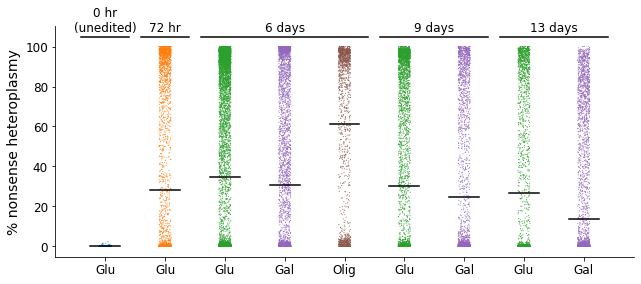

In [12]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['unedited', '72h', 
          'glu_3d', 'gal_3d', 'olig_3d',
          'glu_6d', 'gal_6d',
          'glu_10d', 'gal_10d']
color_list = [cmap(elt) for elt in [0, 0.1, 0.2, 0.4, 0.5, 0.2, 0.4, 0.2, 0.4]]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,4))

for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition_no_rep', y='Mutant_het', dodge=True, s=1, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition_no_rep')['Mutant_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.plot([-0.4, 0.4], [1.05, 1.05], color='k')
axes.text(0, 1.06, '0 hr\n(unedited)', ha='center', va='bottom', fontsize=12)

axes.plot([0.6, 1.4], [1.05, 1.05], color='k')
axes.text(1, 1.06, '72 hr', ha='center', va='bottom', fontsize=12)

axes.plot([1.6, 4.4], [1.05, 1.05], color='k')
axes.text(3, 1.06, '6 days', ha='center', va='bottom', fontsize=12)

axes.plot([4.6, 6.4], [1.05, 1.05], color='k')
axes.text(5.5, 1.06, '9 days', ha='center', va='bottom', fontsize=12)

axes.plot([6.6, 8.4], [1.05, 1.05], color='k')
axes.text(7.5, 1.06, '13 days', ha='center', va='bottom', fontsize=12)

axes.set_xlabel('')
axes.set_ylabel('% nonsense heteroplasmy', fontsize=14)
axes.set_xticks(numpy.arange(len(xorder)))
axes.set_xticklabels(['Glu', 'Glu', 'Glu', 'Gal', 'Olig',
                      'Glu', 'Gal', 'Glu', 'Gal'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

fig.savefig(os.path.join(outdir, 'glu_gal_oligo_timecourse_strip_plot.pdf'), bbox_inches='tight')
fig.tight_layout()

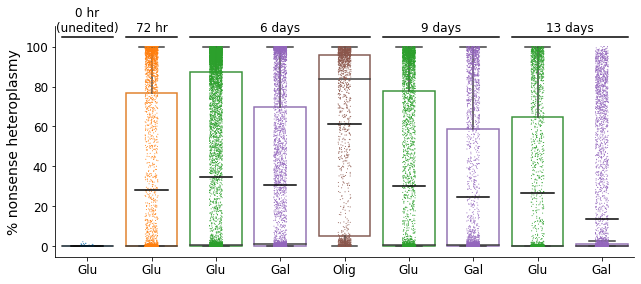

In [13]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['unedited', '72h', 
          'glu_3d', 'gal_3d', 'olig_3d',
          'glu_6d', 'gal_6d',
          'glu_10d', 'gal_10d']
color_list = [cmap(elt) for elt in [0, 0.1, 0.2, 0.4, 0.5, 0.2, 0.4, 0.2, 0.4]]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(9,4))
seaborn.boxplot(data=het_data, x='condition_no_rep', y='Mutant_het', ax=axes, order=xorder, 
                palette=color_list, showfliers=False)
for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition_no_rep', y='Mutant_het', dodge=True, s=1, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition_no_rep')['Mutant_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.plot([-0.4, 0.4], [1.05, 1.05], color='k')
axes.text(0, 1.06, '0 hr\n(unedited)', ha='center', va='bottom', fontsize=12)

axes.plot([0.6, 1.4], [1.05, 1.05], color='k')
axes.text(1, 1.06, '72 hr', ha='center', va='bottom', fontsize=12)

axes.plot([1.6, 4.4], [1.05, 1.05], color='k')
axes.text(3, 1.06, '6 days', ha='center', va='bottom', fontsize=12)

axes.plot([4.6, 6.4], [1.05, 1.05], color='k')
axes.text(5.5, 1.06, '9 days', ha='center', va='bottom', fontsize=12)

axes.plot([6.6, 8.4], [1.05, 1.05], color='k')
axes.text(7.5, 1.06, '13 days', ha='center', va='bottom', fontsize=12)

axes.set_xlabel('')
axes.set_ylabel('% nonsense heteroplasmy', fontsize=14)
axes.set_xticks(numpy.arange(len(xorder)))
axes.set_xticklabels(['Glu', 'Glu', 'Glu', 'Gal', 'Olig',
                      'Glu', 'Gal', 'Glu', 'Gal'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))

fig.savefig(os.path.join(outdir, 'glu_gal_oligo_timecourse_strip_plot.boxplots.pdf'), bbox_inches='tight')
fig.tight_layout()

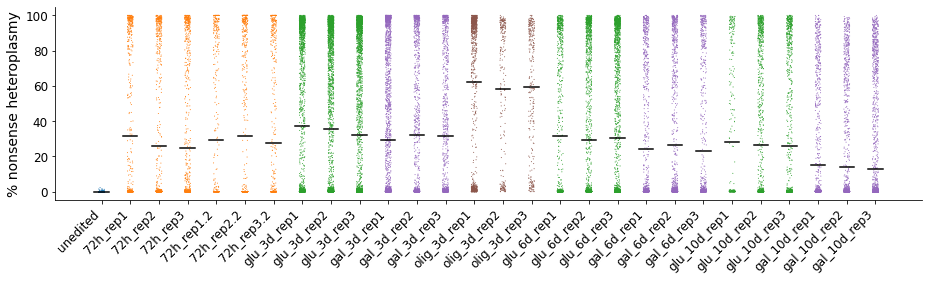

In [14]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['unedited', '72h_rep1', '72h_rep2', '72h_rep3', '72h_rep1.2', '72h_rep2.2', '72h_rep3.2', 
          'glu_3d_rep1', 'glu_3d_rep2', 'glu_3d_rep3', 'gal_3d_rep1', 'gal_3d_rep2', 'gal_3d_rep3', 
          'olig_3d_rep1', 'olig_3d_rep2', 'olig_3d_rep3', 'glu_6d_rep1', 'glu_6d_rep2', 'glu_6d_rep3', 
          'gal_6d_rep1', 'gal_6d_rep2', 'gal_6d_rep3', 'glu_10d_rep1', 'glu_10d_rep2', 'glu_10d_rep3', 
          'gal_10d_rep1', 'gal_10d_rep2', 'gal_10d_rep3']
color_list = [cmap(elt) for elt in [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
                                    0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 
                                    0.2, 0.2, 0.2, 0.4, 0.4, 0.4,
                                    0.2, 0.2, 0.2, 0.4, 0.4, 0.4]]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(13,4))

for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='Mutant_het', dodge=True, s=1, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['Mutant_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% nonsense heteroplasmy', fontsize=14)
axes.set_xticks(numpy.arange(len(xorder)))

axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45, fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

fig.savefig(os.path.join(outdir, 'glu_gal_oligo_timecourse_replicates_strip_plot.pdf'), bbox_inches='tight')
fig.tight_layout()

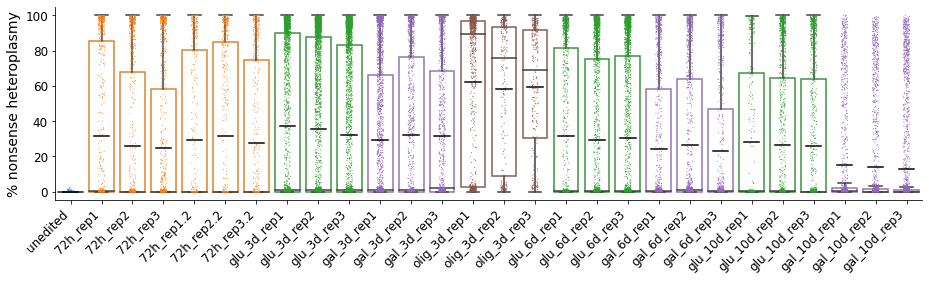

In [15]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['unedited', '72h_rep1', '72h_rep2', '72h_rep3', '72h_rep1.2', '72h_rep2.2', '72h_rep3.2', 
          'glu_3d_rep1', 'glu_3d_rep2', 'glu_3d_rep3', 'gal_3d_rep1', 'gal_3d_rep2', 'gal_3d_rep3', 
          'olig_3d_rep1', 'olig_3d_rep2', 'olig_3d_rep3', 'glu_6d_rep1', 'glu_6d_rep2', 'glu_6d_rep3', 
          'gal_6d_rep1', 'gal_6d_rep2', 'gal_6d_rep3', 'glu_10d_rep1', 'glu_10d_rep2', 'glu_10d_rep3', 
          'gal_10d_rep1', 'gal_10d_rep2', 'gal_10d_rep3']
color_list = [cmap(elt) for elt in [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 
                                    0.2, 0.2, 0.2, 0.4, 0.4, 0.4, 0.5, 0.5, 0.5, 
                                    0.2, 0.2, 0.2, 0.4, 0.4, 0.4,
                                    0.2, 0.2, 0.2, 0.4, 0.4, 0.4]]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(13,4))
seaborn.boxplot(data=het_data, x='condition', y='Mutant_het', ax=axes, order=xorder, 
                palette=color_list, showfliers=False)
for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='Mutant_het', dodge=True, s=1, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['Mutant_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% nonsense heteroplasmy', fontsize=14)
axes.set_xticklabels(axes.get_xticklabels(), ha='right', rotation=45, fontsize=12)

axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))

fig.savefig(os.path.join(outdir, 'glu_gal_oligo_timecourse_replicates_strip_plot.boxplots.pdf'), bbox_inches='tight')
fig.tight_layout()

## GFP sorting plot

In [16]:
het_data = pandas.read_csv('./SCI-LITE_sorting/heteroplasmy_dataframe.csv')
print(het_data.shape)
het_data.head()

(9978, 13)


,cell_id,condition,umi_count,LHON,LHON/SILENT,SILENT,WT,umi_count_for_filtering,umi_count_rank,LHON_het,SILENT_het,SILENT_ONLY_het,total_het
0,A1-CTCAATGA-TAAGGTAA,d5_low_silent_r1,34,0,1,2,31,34,4902,0.029412,0.088235,0.058824,0.088235
1,A1-ACACAGAA-GATACGCA,d5_unsort_lhon_r3,37,0,3,1,33,37,4429,0.081081,0.108108,0.027027,0.108108
2,A1-AACAACCA-CGTTAGAT,d5_unsort_lhon_r1,30,0,4,8,18,30,6043,0.133333,0.400000,0.266667,0.400000
3,A1-ACGTATCA-GCATGCCG,d5_unsort_silent_r2,25,0,3,7,15,25,8087,0.120000,0.400000,0.280000,0.400000
4,A1-CCGTGAGA-CCAGGCTT,d5_low_lhon_r1,24,0,2,1,21,24,8095,0.083333,0.125000,0.041667,0.125000


In [17]:
het_data['condition'].unique()

array(['d5_low_silent_r1', 'd5_unsort_lhon_r3', 'd5_unsort_lhon_r1',
       'd5_unsort_silent_r2', 'd5_low_lhon_r1', 'd5_med_lhon_r3',
       'd5_high_lhon_r3', 'd5_unsort_lhon_r2', 'd5_med_lhon_r1',
       'd0_lhon_r2', 'd5_unsort_silent_r3', 'd0_silent_r1', 'd0_lhon_r1',
       'd5_high_silent_r1', 'd5_low_lhon_r3', 'd5_high_silent_r2',
       'd0_lhon_r3', 'd5_high_silent_r3', 'd5_unsort_silent_r1',
       'd5_high_lhon_r1', 'd5_low_silent_r3', 'd5_med_lhon_r2',
       'd0_silent_r2', 'd5_high_lhon_r2', 'd0_silent_r3',
       'd5_low_silent_r2'], dtype=object)

### LHON editor

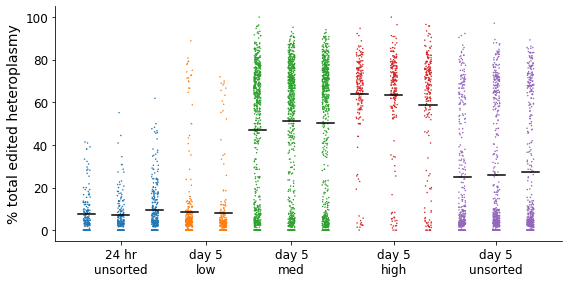

In [18]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.2, 0.3, 0.4, 0.5]]))
color_list = color_list[:4] + color_list[5:]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))

for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='total_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['total_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% total edited heteroplasmy', fontsize=14)
axes.set_xticks([1, 3.5, 6, 9, 12])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nmed', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.lhon_ed.total_het.pdf'), bbox_inches='tight')
fig.tight_layout()

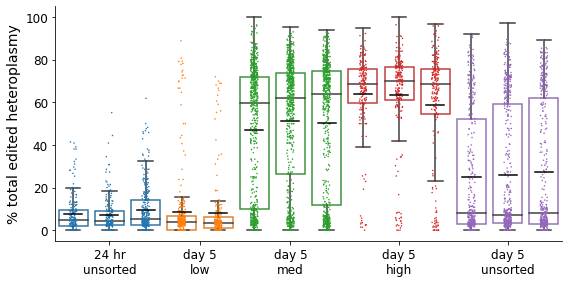

In [19]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.2, 0.3, 0.4, 0.5]]))
color_list = color_list[:4] + color_list[5:]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))
seaborn.boxplot(data=het_data, x='condition', y='total_het', ax=axes, order=xorder, 
                palette=color_list, showfliers=False)
for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='total_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['total_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% total edited heteroplasmy', fontsize=14)
axes.set_xticks([1, 3.5, 6, 9, 12])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nmed', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.lhon_ed.total_het.boxplots.pdf'), bbox_inches='tight')
fig.tight_layout()

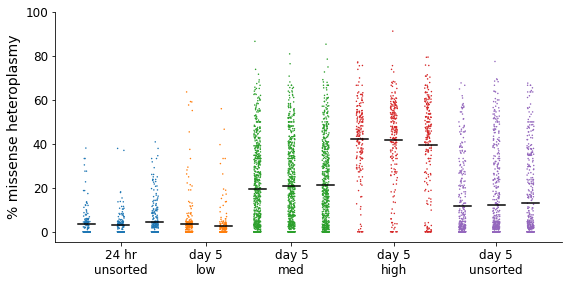

In [20]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.2, 0.3, 0.4, 0.5]]))
color_list = color_list[:4] + color_list[5:]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))

for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='LHON_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['LHON_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% missense heteroplasmy', fontsize=14)
axes.set_xticks([1, 3.5, 6, 9, 12])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nmed', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.lhon_ed.LHON_het.pdf'), bbox_inches='tight')
fig.tight_layout()

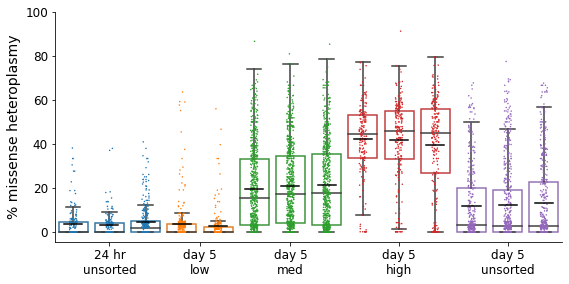

In [21]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.2, 0.3, 0.4, 0.5]]))
color_list = color_list[:4] + color_list[5:]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))
seaborn.boxplot(data=het_data, x='condition', y='LHON_het', ax=axes, order=xorder, 
                palette=color_list, showfliers=False)
for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='LHON_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['LHON_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% missense heteroplasmy', fontsize=14)
axes.set_xticks([1, 3.5, 6, 9, 12])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nmed', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.lhon_ed.LHON_het.boxplots.pdf'), bbox_inches='tight')
fig.tight_layout()

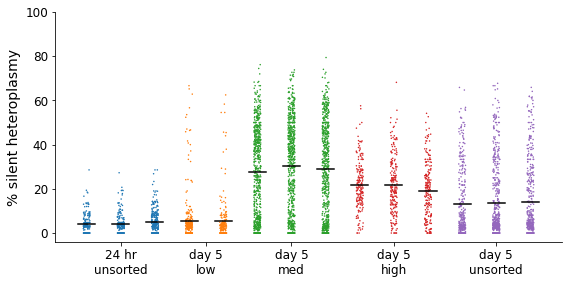

In [22]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.2, 0.3, 0.4, 0.5]]))
color_list = color_list[:4] + color_list[5:]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))
for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='SILENT_ONLY_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['SILENT_ONLY_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% silent heteroplasmy', fontsize=14)
axes.set_xticks([1, 3.5, 6, 9, 12])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nmed', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.lhon_ed.silent_het.pdf'), bbox_inches='tight')
fig.tight_layout()

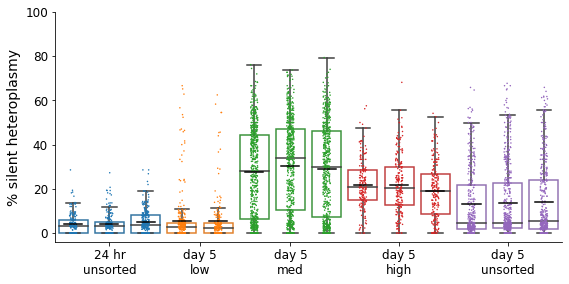

In [23]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_lhon_r1', 'd0_lhon_r2', 'd0_lhon_r3',
          'd5_low_lhon_r1', 'd5_low_lhon_r3',
          'd5_med_lhon_r1', 'd5_med_lhon_r2', 'd5_med_lhon_r3',
          'd5_high_lhon_r1', 'd5_high_lhon_r2', 'd5_high_lhon_r3',
          'd5_unsort_lhon_r1', 'd5_unsort_lhon_r2', 'd5_unsort_lhon_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.2, 0.3, 0.4, 0.5]]))
color_list = color_list[:4] + color_list[5:]

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))
seaborn.boxplot(data=het_data, x='condition', y='SILENT_ONLY_het', ax=axes, order=xorder, 
                palette=color_list, showfliers=False)
for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='SILENT_ONLY_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['SILENT_ONLY_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% silent heteroplasmy', fontsize=14)
axes.set_xticks([1, 3.5, 6, 9, 12])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nmed', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.lhon_ed.silent_het.boxplots.pdf'), bbox_inches='tight')
fig.tight_layout()

### SILENT editor

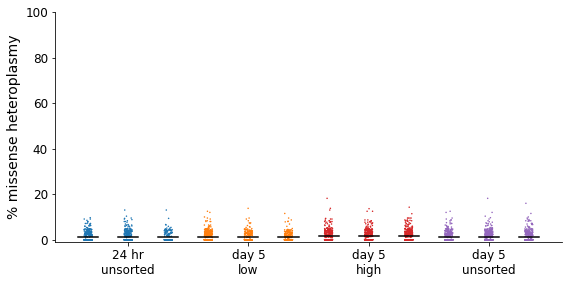

In [24]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_silent_r1', 'd0_silent_r2', 'd0_silent_r3',
          'd5_low_silent_r1', 'd5_low_silent_r2', 'd5_low_silent_r3',
          'd5_high_silent_r1', 'd5_high_silent_r2', 'd5_high_silent_r3',
          'd5_unsort_silent_r1', 'd5_unsort_silent_r2', 'd5_unsort_silent_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.3, 0.4, 0.5]]))

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))

for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='LHON_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['LHON_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% missense heteroplasmy', fontsize=14)
axes.set_xticks([1, 4, 7, 10])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.silent_ed.LHON_het.pdf'), bbox_inches='tight')
fig.tight_layout()

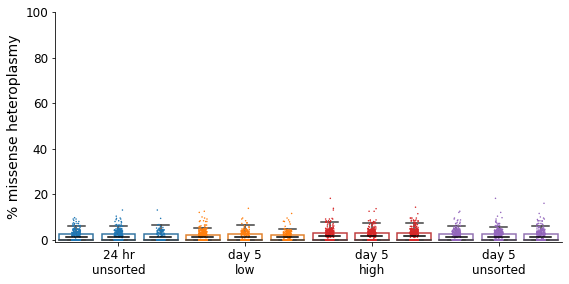

In [25]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_silent_r1', 'd0_silent_r2', 'd0_silent_r3',
          'd5_low_silent_r1', 'd5_low_silent_r2', 'd5_low_silent_r3',
          'd5_high_silent_r1', 'd5_high_silent_r2', 'd5_high_silent_r3',
          'd5_unsort_silent_r1', 'd5_unsort_silent_r2', 'd5_unsort_silent_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.3, 0.4, 0.5]]))

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))
seaborn.boxplot(data=het_data, x='condition', y='LHON_het', ax=axes, order=xorder, 
                palette=color_list, showfliers=False)
for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='LHON_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['LHON_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% missense heteroplasmy', fontsize=14)
axes.set_xticks([1, 4, 7, 10])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.silent_ed.LHON_het.boxplots.pdf'), bbox_inches='tight')
fig.tight_layout()

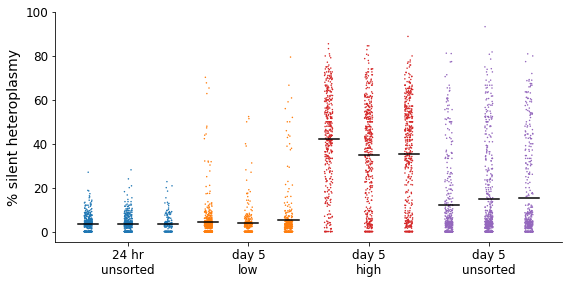

In [26]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_silent_r1', 'd0_silent_r2', 'd0_silent_r3',
          'd5_low_silent_r1', 'd5_low_silent_r2', 'd5_low_silent_r3',
          'd5_high_silent_r1', 'd5_high_silent_r2', 'd5_high_silent_r3',
          'd5_unsort_silent_r1', 'd5_unsort_silent_r2', 'd5_unsort_silent_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.3, 0.4]]))

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))
for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='SILENT_ONLY_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['SILENT_ONLY_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% silent heteroplasmy', fontsize=14)
axes.set_xticks([1, 4, 7, 10])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.silent_ed.silent_het.pdf'), bbox_inches='tight')
fig.tight_layout()

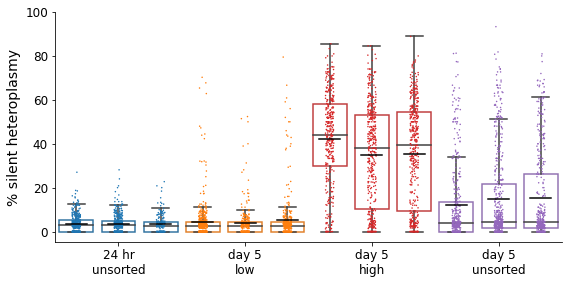

In [27]:
cmap = matplotlib.cm.get_cmap('tab10')
xorder = ['d0_silent_r1', 'd0_silent_r2', 'd0_silent_r3',
          'd5_low_silent_r1', 'd5_low_silent_r2', 'd5_low_silent_r3',
          'd5_high_silent_r1', 'd5_high_silent_r2', 'd5_high_silent_r3',
          'd5_unsort_silent_r1', 'd5_unsort_silent_r2', 'd5_unsort_silent_r3']
color_list = list(itertools.chain(*[[cmap(elt)]*3 for elt in [0, 0.1, 0.3, 0.4]]))

fig, axes = pyplot.subplots(nrows=1, ncols=1, figsize=(8,4))
seaborn.boxplot(data=het_data, x='condition', y='SILENT_ONLY_het', ax=axes, order=xorder, 
                palette=color_list, showfliers=False)
for spine in ['top', 'right']:
    axes.spines[spine].set_visible(False)

seaborn.stripplot(data=het_data, x='condition', y='SILENT_ONLY_het', dodge=True, s=1.5, order=xorder, 
                  palette=color_list, ax=axes)

meanvals = het_data.groupby('condition')['SILENT_ONLY_het'].mean()[xorder]
for idx in range(len(xorder)):
    axes.plot([idx - 0.25, idx + 0.25], [meanvals[idx], meanvals[idx]],
              color='k', zorder=100, label='mean het estimate')

axes.set_xlabel('')
axes.set_ylabel('% silent heteroplasmy', fontsize=14)
axes.set_xticks([1, 4, 7, 10])
axes.set_xticklabels(['24 hr\nunsorted', 'day 5\nlow', 'day 5\nhigh', 'day 5\nunsorted'], fontsize=12)
axes.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
axes.set_yticklabels(['0', '20', '40', '60', '80', '100'], fontsize=12)

for patch in axes.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0))
    patch.set_edgecolor((r, g, b, 1))
    
fig.savefig(os.path.join(outdir, 'gfp_sorting_strip_plot.silent_ed.silent_het.boxplots.pdf'), bbox_inches='tight')
fig.tight_layout()